In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns

2023-06-01 17:13:33.397152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [41]:
vueltas = pd.read_csv("../dataset_todos_pilotos/vueltas_spain_final.csv")


In [42]:
list(vueltas.columns.values)

['LapTime',
 'LapNumber',
 'TyreLife',
 'FreshTyre',
 'TrackStatus',
 'Stint',
 'Piloto',
 'makeStop',
 'AirTemp',
 'Rainfall',
 'Humidity',
 'TrackTemp',
 'posicionActual',
 'tiempoPilotoDelante',
 'tiempoPilotoDetras',
 'posicionSalida',
 'anyo',
 'nextPit',
 'compound_HARD',
 'compound_MEDIUM',
 'compound_SOFT',
 'compound_SUPERSOFT']

In [43]:
#vueltas.drop(['LapTime'], axis = 1, inplace = True)#Quitamos Laptime para ver cuando baja la prediccion
#vueltas.drop(['LapNumber'], axis = 1, inplace = True)#Quitamos Laptime para ver cuando baja la prediccion
#vueltas.drop(['nextPit'], axis = 1, inplace = True)#Quitamos Laptime para ver cuando baja la prediccion
#vueltas.drop(['tiempoPilotoDelante'], axis = 1, inplace = True)#Quitamos Laptime para ver cuando baja la prediccion
#vueltas.drop(['tiempoPilotoDetras'], axis = 1, inplace = True)#Quitamos Laptime para ver cuando baja la prediccion

columnas = ["Stint", "Piloto","anyo"]
vueltas = vueltas[columnas]


#vueltas.drop(['makeStop'], axis = 1, inplace = True)
#vueltas.drop(['Piloto'], axis = 1, inplace = True)

vueltas_train = vueltas[vueltas['anyo'].isin([2018, 2019, 2020, 2021])]
vueltas_test = vueltas[vueltas['anyo'] == 2022]

#vueltas_test = vueltas_test[vueltas_test['Piloto'] == "alonso"]

vueltas_train = vueltas_train.drop(['anyo'], axis=1)
vueltas_test = vueltas_test.drop(['anyo'], axis=1)

vueltas_train.drop(['Piloto'], axis = 1, inplace = True)
vueltas_test.drop(['Piloto'], axis = 1, inplace = True)


vueltas_train = vueltas_train.astype(float)
vueltas_test = vueltas_test.astype(float)

In [22]:
scaler = MinMaxScaler()
scaler.fit(vueltas_train)
vueltas_train_scaler = scaler.transform(vueltas_train)
vueltas_test_scaler = scaler.transform(vueltas_test)

In [23]:
pd.DataFrame(vueltas_test_scaler)

,0
0,0.000000
1,0.000000
2,0.000000
3,0.000000
4,0.000000
...,...
1069,0.333333
1070,0.333333
1071,0.333333
1072,0.333333


In [24]:
trainX = []
trainY = []
testX = []
testY = []
loopback = 10 # Esto es el numero de muestras que usara en el pasado 
future = 1 # Esto es el numero de hechos futuros que usará como salida a las 10 muestras del pasado

for i in range (loopback, len(vueltas_train_scaler) -future +1):
    trainX.append(vueltas_train_scaler[i-loopback:i, 0:vueltas_train.shape[1]])
    trainY.append(vueltas_train_scaler[i + future - 1:i + future, 0]) #Ajustar aqui la columna de stint
    
for i in range (loopback, len(vueltas_test_scaler) -future +1):
    testX.append(vueltas_test_scaler[i-loopback:i, 0:vueltas_test.shape[1]]) #Aqui le tengo que quitar el Stint??
    testY.append(vueltas_test_scaler[i + future - 1:i + future,0])


In [25]:
trainX, trainY, testX, testY= np.array(trainX), np.array(trainY), np.array(testX), np.array(testY)

In [26]:
model = Sequential()
model.add(LSTM(256, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))
model.compile(optimizer="adam", loss= "mse") ##Cambiar esto para la siguiente reunion (positivo 1, negativo 0)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 256)           264192    
                                                                 
 dropout_2 (Dropout)         (None, 10, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               197120    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 461,441
Trainable params: 461,441
Non-trainable params: 0
_________________________________________________________________


Epoch 1/12
64/64 [==============================] - 7s 62ms/step - loss: 0.0355
Epoch 2/12
64/64 [==============================] - 4s 66ms/step - loss: 0.0193
Epoch 3/12
64/64 [==============================] - 4s 64ms/step - loss: 0.0158
Epoch 4/12
64/64 [==============================] - 4s 66ms/step - loss: 0.0140
Epoch 5/12
64/64 [==============================] - 6s 91ms/step - loss: 0.0129
Epoch 6/12
64/64 [==============================] - 4s 65ms/step - loss: 0.0120
Epoch 7/12
64/64 [==============================] - 6s 90ms/step - loss: 0.0121
Epoch 8/12
64/64 [==============================] - 5s 76ms/step - loss: 0.0110
Epoch 9/12
64/64 [==============================] - 5s 73ms/step - loss: 0.0111
Epoch 10/12
64/64 [==============================] - 7s 108ms/step - loss: 0.0105
Epoch 11/12
64/64 [==============================] - 6s 85ms/step - loss: 0.0108
Epoch 12/12
64/64 [==============================] - 4s 68ms/step - loss: 0.0103


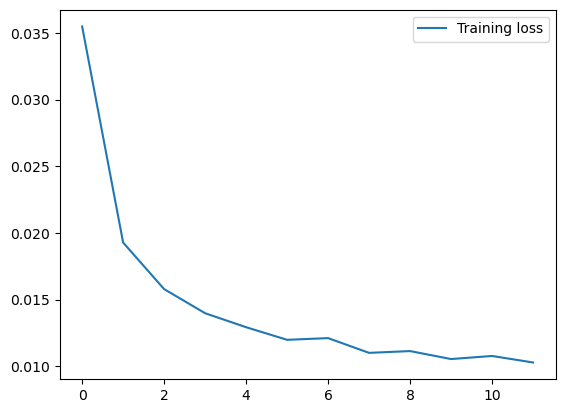

In [27]:
history = model.fit(trainX, trainY, epochs=12, batch_size=64, validation_split=0.0, verbose=1, shuffle=True)

plt.plot(history.history['loss'], label='Training loss')
plt.legend()

In [28]:
testY.shape

(1064, 1)

In [29]:
clases = np.unique(trainY[:,0])
clases

array([0.        , 0.33333333, 0.66666667, 1.        ])

In [30]:
f = lambda x: np.argwhere(x == clases)
f = np.vectorize(f)
y_real = f(testY[:,0])

In [31]:
predictions = model.predict(testX)

34/34 [==============================] - 1s 11ms/step


In [32]:
vueltas_train

,Stint
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4072,1.0
4073,1.0
4074,1.0
4075,1.0


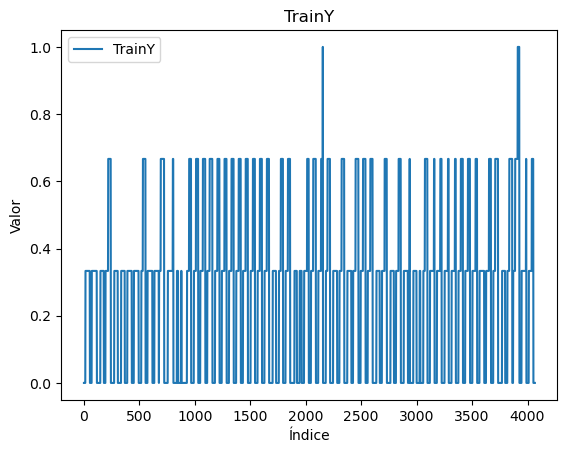

In [33]:
values1 = trainY.flatten()
indices1 = np.arange(len(values1))


# Crear el gráfico
plt.plot(indices1, values1, label='TrainY')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('TrainY')
plt.legend()
plt.show()

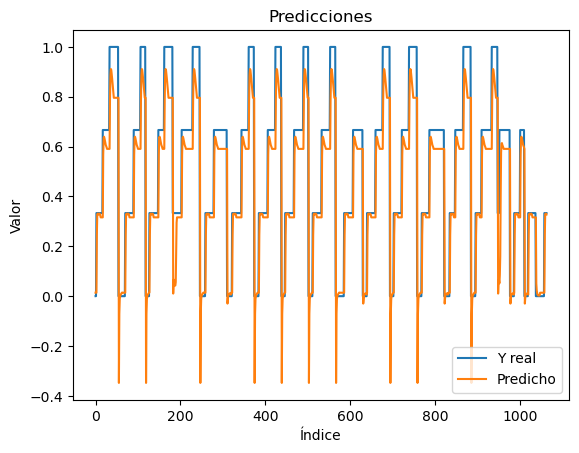

In [15]:
values1 = testY.flatten()
indices1 = np.arange(len(values1))

values2 = predictions.flatten()
indices2 = np.arange(len(values2))

# Crear el gráfico
plt.plot(indices1, values1, label='Y real')
plt.plot(indices2, values2, label='Predicho')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Predicciones')
plt.legend()
plt.show()

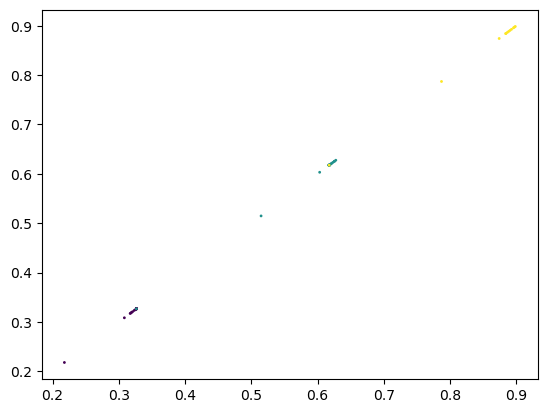

In [645]:
plt.scatter(predictions[:,0], predictions[:,0], s=1, c=y_real+1)

In [646]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictions, y_real, test_size=0.3, stratify=y_real)

In [647]:
from sklearn.linear_model import LogisticRegression
rl = LogisticRegression(random_state=0, penalty=None).fit(X_train, y_train)

In [648]:
pred_test_2 = rl.predict(X_test)

In [659]:
pred_test_2

array([3, 1, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 3, 1, 1, 2, 1])

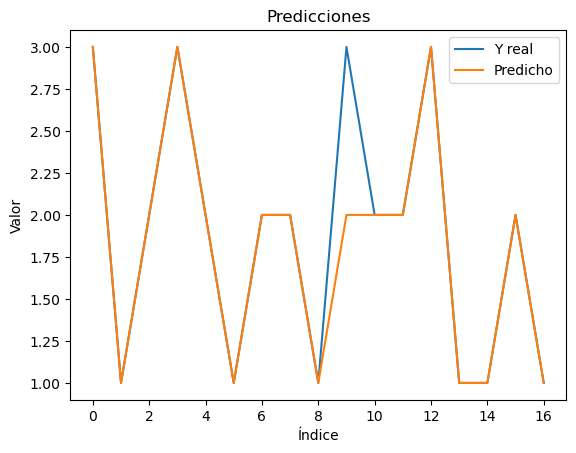

In [658]:
values1 = y_test.flatten()
indices1 = np.arange(len(values1))

values2 = pred_test_2.flatten()
indices2 = np.arange(len(values2))

# Crear el gráfico
plt.plot(indices1, values1, label='Y real')
plt.plot(indices2, values2, label='Predicho')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Predicciones')
plt.legend()
plt.show()

In [660]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, pred_test_2))
print(classification_report(y_test, pred_test_2))

[[6 0 0]
 [0 7 0]
 [0 1 3]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.88      1.00      0.93         7
           3       1.00      0.75      0.86         4

    accuracy                           0.94        17
   macro avg       0.96      0.92      0.93        17
weighted avg       0.95      0.94      0.94        17



# Sin quitar nada -> 0.94
##### Si le quito LapTime -> 0.92
##### Si le quito LapTime + LapNumber -> 0.90
##### Si le quito NextPit solo -> 0.85
##### Si le quito NextPit + Laptime + LapNumber -> 0.91
##### Si le quito NextPit + Laptime + LapNumber + TiempoPilotoDelante + TiempoPilotoDetras -> 0.65
##### Si le quito tiempoPilotoDelante -> 0.91
##### Si le quito tiempoPilotoDelante + tiempoPilotoDetras -> 0.88
##### Si le quito makeStop-> 0.84
##### Si le dejo solo nextPit + LapTime + LapNumber + tiempoPilotoDelante + tiempoPilotoDetras + Stint -> 0.93
##### Si le dejo solo nextPit -> 0.90
##### Si le dejo solo LapTime -> 0.96
##### Si le dejo solo LapNumber -> 0.91
##### Si le dejo solo tiempoPilotoDelante -> 0.93
##### Si le dejo solo tiempoPilotoDetras -> 0.96



In [650]:
vueltas_train

,Stint
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4072,1.0
4073,1.0
4074,1.0
4075,1.0
